In [1]:
#import libraries for pre-processing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm

# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [2]:
csv = pd.read_csv('preprocessed_train.csv', encoding='euc-kr')

In [3]:
csv

,분석데이터,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,1,1,144,12.298611,1771,5.356616,0,0,0,1,...,10,4,10,9,4,0,1,0,0,0
1,2,1,804,9.580846,7703,6.063542,0,0,0,6,...,43,121,84,78,47,36,40,45,27,36
2,3,0,2205,12.736054,28083,6.107050,9,0,0,6,...,326,268,239,286,199,148,154,37,48,36
3,4,0,2602,10.288240,26770,5.373013,8,0,0,1,...,336,230,206,245,76,0,26,702,1,5
4,5,1,8980,23.252339,208806,5.775223,0,28,16,3,...,731,882,1171,1010,322,64,327,84,75,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,2018,13.938057,28127,5.940442,0,70,0,11,...,246,186,206,235,88,33,81,58,61,72
9996,9997,0,1105,16.437104,18163,5.766962,0,11,0,3,...,199,57,134,123,20,25,28,25,41,13
9997,9998,0,4,58.500000,234,3.811827,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,9999,1,3312,24.939312,82599,5.834730,0,39,0,8,...,438,985,806,851,113,123,181,100,75,86


In [4]:
for i in range(9999):
    print(csv['printables'][i])

1771
7703
28083
26770
208806
82599
127449
1447
37623
6086
123303
53544
1406719
37978
21018
18368
127459
4786
10508
3896
50839
82519
20618
7006
82559
802
96748
9234
366
105827
1786
1405
2376
80823
258867
5940
82603
413
42086
998
48936
2230
352449
2464
4618
170
2547
1719
521105
8929
919598
106182
5094
5520
59191
127432
5575
13916
8262
78170
15499
342
81298
82855
46268
69895
43211
24554
10798
128242
5142
16435
15051
28275
115381
26281
82587
91745
4868
1620
120610
82547
82603
919580
695725
1183
6065
79835
4653
2114
3164
143874
40723
119010
9821
94272
93362
536
13805
82599
1253
33996
140091
2638
45635
97540
5988
13447
4610
12682
47117
50541
3958
1399909
1410607
5520
145904
18951
13474
1414489
2040
131957
254348
8543
1399909
307
2569
4619
516869
4641
126803
82835
17064
26028
58
899092
82559
48021
1009
77697
343132
14266
4628
71339
4814
127065
24072
12319
5163
734516
11336
57972
56164
48836
12537
18586
140091
23437
9973
3138
2108
4961
1410601
3060
14297
614503
11020
110268
112637
39445
3386
4

97548
3509
5914
19720
27787
25920
234
20441
3413
2730
97590
82815
82571
25941
474808
898997
27052
127524
285
2274
146633
79261
166074
7712
70537
41530
24886
6768
25493
4474
1410606
18590
82643
42684
4637
9845
4635
2369
4559
97538
25231
88580
22828
21510
50827
5728
47622
82695
909295
5449
37998
34848
62047
32357
22558
158
2447
607844
2163
5244
3238
47373
7950
79525
10255
4636
11958
4382
488516
6222
25102
63068
5927
5073
133083
47994
27047
51221
461980
1613
327
13402
523
82519
20034
100349
85162
1416433
695723
480741
12494
7378
909246
2340
4891
14522
4725
1925
82559
171630
4849
6711
42842
8203
82519
4654
6104
40517
82563
8282
193
24385
360731
4122
2332
478
12894
5425
50453
1438
8424
2955
41368
47595
46669
462
317
44720
11928
66873
28040
119061
5372
24703
554
37529
202947
157
3049
6307
614428
563152
6795
1409634
24283
15170
2108
4648
9545
6092
891
11746
11152
82559
97545
46625
29330
82659
7833
19837
97559
19681
182027
109594
222654
35069
909255
269467
84219
2367
10284
1170
14666
2098
3405

909218
1404769
18069
495
67372
8392
169636
57
4563
1978
2955
32248
164
916088
132154
57
9154
61655
23180
12256
524
877
2796
13915
130
4312
193123
1095844
4173
225037
31641
96729
127440
5701
8567
11718
7843
49548
407917
815389
82579
2096
500863
63239
29577
16991
107621
4650
206467
16864
99956
9802
13945
17080
10793
17301
254838
161493
39015
50
4561
4469
7873
10707
19336
82559
7399
39700
69297
4561
30813
108184
198744
42156
82527
661065
48579
21925
137436
45437
46814
899037
1650
21460
72
3240
4606
58
7929
139109
27768
1684
1182
899003
1489
31375
1416433
57
1045
29397
558
30483
128182
140110
127503
284209
2356
2034
11873
80
31796
115386
637
36518
17192
562
19656
206380
219
4204
82
1399909
318
127477
44226
126386
455531
6612
82627
82699
14277
7862
2955
149565
82555
3994
47113
32200
27796
47503
97615
14488
5956
1406
16368
43483
1539
6153
2764
1414489
4024
2192
410336
13552
33919
1167
24416
132092
17271
181326
82619
8642
2328
35046
263204
82503
12403
24768
130853
9266
160511
20073
104807
816

In [5]:
np.median(csv['printables'])

24098.5

In [6]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 618 entries, 분석데이터 to dist_95
dtypes: float64(2), int64(616)
memory usage: 47.1 MB


C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\b

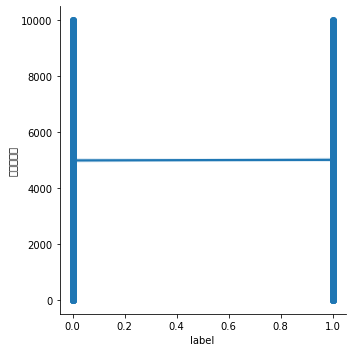

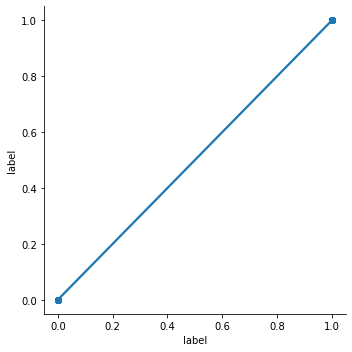

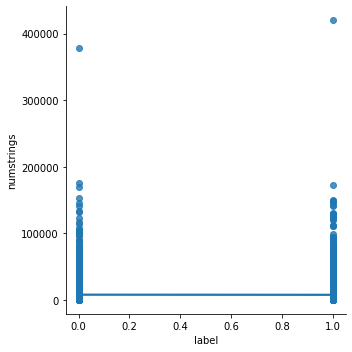

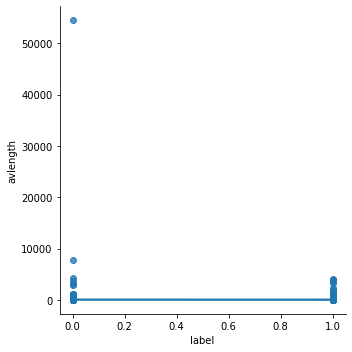

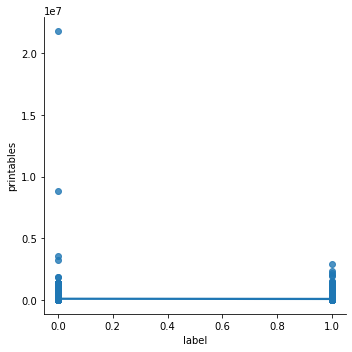

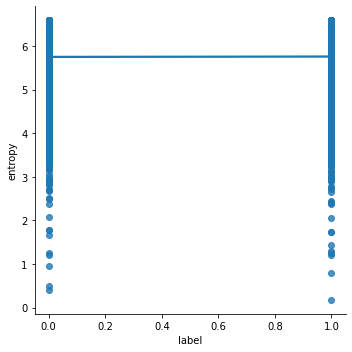

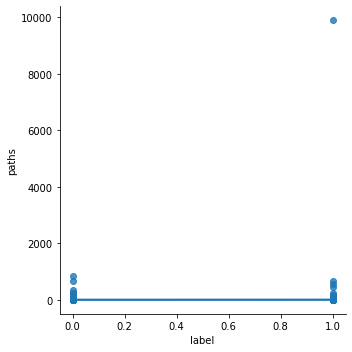

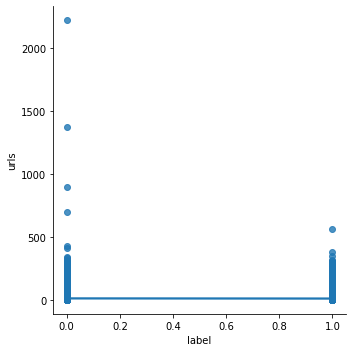

In [7]:
for i in range(8):
    sns.lmplot(data= csv, x='label', y= csv.columns[i])

C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\lib\site-packages\matplotlib\b

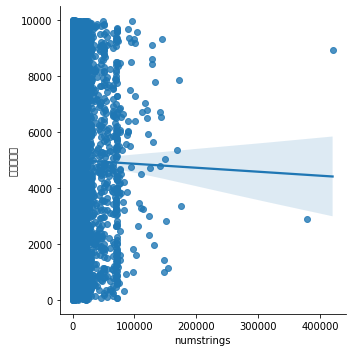

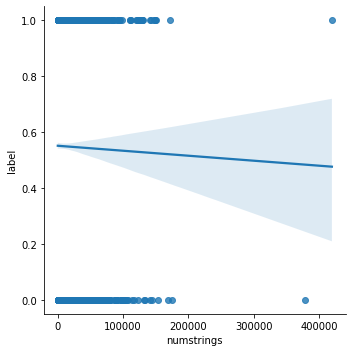

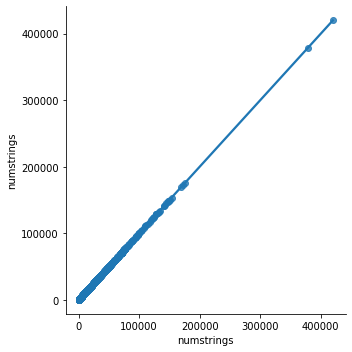

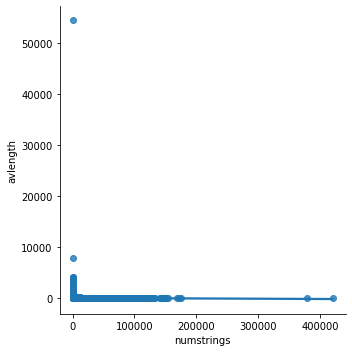

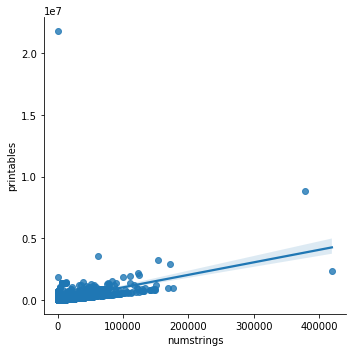

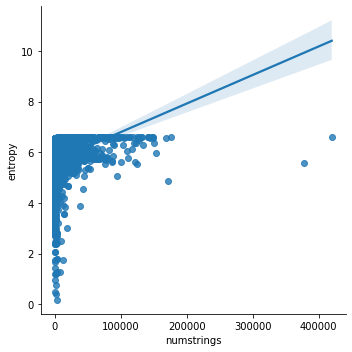

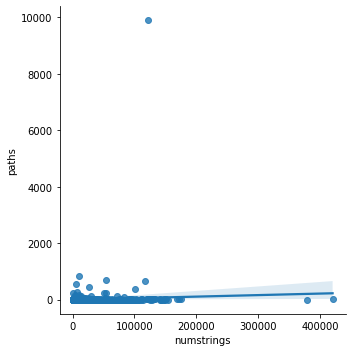

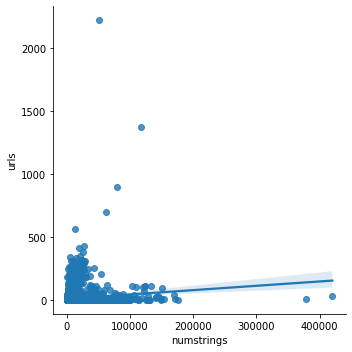

In [8]:
for i in range(8):
    sns.lmplot(data= csv, x='numstrings', y= csv.columns[i])

In [9]:
len(csv)

10000

In [10]:
colMax = [ 200000.0, 10000.0, 0.5,  7, 1000, 500, 24098.5 ]

In [11]:
len(colMax)

7

In [12]:
train = csv

In [13]:
csv[csv.columns[2]][1]

804

In [14]:
train.index

RangeIndex(start=0, stop=10000, step=1)

In [16]:
for i in range(7):
    for j in range(9999):
        print(i,j)
        if csv[csv.columns[i]][j] > colMax[i]:
            print()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


0 1657
0 1658
0 1659
0 1660
0 1661
0 1662
0 1663
0 1664
0 1665
0 1666
0 1667
0 1668
0 1669
0 1670
0 1671
0 1672
0 1673
0 1674
0 1675
0 1676
0 1677
0 1678
0 1679
0 1680
0 1681
0 1682
0 1683
0 1684
0 1685
0 1686
0 1687
0 1688
0 1689
0 1690
0 1691
0 1692
0 1693
0 1694
0 1695
0 1696
0 1697
0 1698
0 1699
0 1700
0 1701
0 1702
0 1703
0 1704
0 1705
0 1706
0 1707
0 1708
0 1709
0 1710
0 1711
0 1712
0 1713
0 1714
0 1715
0 1716
0 1717
0 1718
0 1719
0 1720
0 1721
0 1722
0 1723
0 1724
0 1725
0 1726
0 1727
0 1728
0 1729
0 1730
0 1731
0 1732
0 1733
0 1734
0 1735
0 1736
0 1737
0 1738
0 1739
0 1740
0 1741
0 1742
0 1743
0 1744
0 1745
0 1746
0 1747
0 1748
0 1749
0 1750
0 1751
0 1752
0 1753
0 1754
0 1755
0 1756
0 1757
0 1758
0 1759
0 1760
0 1761
0 1762
0 1763
0 1764
0 1765
0 1766
0 1767
0 1768
0 1769
0 1770
0 1771
0 1772
0 1773
0 1774
0 1775
0 1776
0 1777
0 1778
0 1779
0 1780
0 1781
0 1782
0 1783
0 1784
0 1785
0 1786
0 1787
0 1788
0 1789
0 1790
0 1791
0 1792
0 1793
0 1794
0 1795
0 1796
0 1797
0 1798
0 1799

0 3407
0 3408
0 3409
0 3410
0 3411
0 3412
0 3413
0 3414
0 3415
0 3416
0 3417
0 3418
0 3419
0 3420
0 3421
0 3422
0 3423
0 3424
0 3425
0 3426
0 3427
0 3428
0 3429
0 3430
0 3431
0 3432
0 3433
0 3434
0 3435
0 3436
0 3437
0 3438
0 3439
0 3440
0 3441
0 3442
0 3443
0 3444
0 3445
0 3446
0 3447
0 3448
0 3449
0 3450
0 3451
0 3452
0 3453
0 3454
0 3455
0 3456
0 3457
0 3458
0 3459
0 3460
0 3461
0 3462
0 3463
0 3464
0 3465
0 3466
0 3467
0 3468
0 3469
0 3470
0 3471
0 3472
0 3473
0 3474
0 3475
0 3476
0 3477
0 3478
0 3479
0 3480
0 3481
0 3482
0 3483
0 3484
0 3485
0 3486
0 3487
0 3488
0 3489
0 3490
0 3491
0 3492
0 3493
0 3494
0 3495
0 3496
0 3497
0 3498
0 3499
0 3500
0 3501
0 3502
0 3503
0 3504
0 3505
0 3506
0 3507
0 3508
0 3509
0 3510
0 3511
0 3512
0 3513
0 3514
0 3515
0 3516
0 3517
0 3518
0 3519
0 3520
0 3521
0 3522
0 3523
0 3524
0 3525
0 3526
0 3527
0 3528
0 3529
0 3530
0 3531
0 3532
0 3533
0 3534
0 3535
0 3536
0 3537
0 3538
0 3539
0 3540
0 3541
0 3542
0 3543
0 3544
0 3545
0 3546
0 3547
0 3548
0 3549

0 5157
0 5158
0 5159
0 5160
0 5161
0 5162
0 5163
0 5164
0 5165
0 5166
0 5167
0 5168
0 5169
0 5170
0 5171
0 5172
0 5173
0 5174
0 5175
0 5176
0 5177
0 5178
0 5179
0 5180
0 5181
0 5182
0 5183
0 5184
0 5185
0 5186
0 5187
0 5188
0 5189
0 5190
0 5191
0 5192
0 5193
0 5194
0 5195
0 5196
0 5197
0 5198
0 5199
0 5200
0 5201
0 5202
0 5203
0 5204
0 5205
0 5206
0 5207
0 5208
0 5209
0 5210
0 5211
0 5212
0 5213
0 5214
0 5215
0 5216
0 5217
0 5218
0 5219
0 5220
0 5221
0 5222
0 5223
0 5224
0 5225
0 5226
0 5227
0 5228
0 5229
0 5230
0 5231
0 5232
0 5233
0 5234
0 5235
0 5236
0 5237
0 5238
0 5239
0 5240
0 5241
0 5242
0 5243
0 5244
0 5245
0 5246
0 5247
0 5248
0 5249
0 5250
0 5251
0 5252
0 5253
0 5254
0 5255
0 5256
0 5257
0 5258
0 5259
0 5260
0 5261
0 5262
0 5263
0 5264
0 5265
0 5266
0 5267
0 5268
0 5269
0 5270
0 5271
0 5272
0 5273
0 5274
0 5275
0 5276
0 5277
0 5278
0 5279
0 5280
0 5281
0 5282
0 5283
0 5284
0 5285
0 5286
0 5287
0 5288
0 5289
0 5290
0 5291
0 5292
0 5293
0 5294
0 5295
0 5296
0 5297
0 5298
0 5299

0 6958
0 6959
0 6960
0 6961
0 6962
0 6963
0 6964
0 6965
0 6966
0 6967
0 6968
0 6969
0 6970
0 6971
0 6972
0 6973
0 6974
0 6975
0 6976
0 6977
0 6978
0 6979
0 6980
0 6981
0 6982
0 6983
0 6984
0 6985
0 6986
0 6987
0 6988
0 6989
0 6990
0 6991
0 6992
0 6993
0 6994
0 6995
0 6996
0 6997
0 6998
0 6999
0 7000
0 7001
0 7002
0 7003
0 7004
0 7005
0 7006
0 7007
0 7008
0 7009
0 7010
0 7011
0 7012
0 7013
0 7014
0 7015
0 7016
0 7017
0 7018
0 7019
0 7020
0 7021
0 7022
0 7023
0 7024
0 7025
0 7026
0 7027
0 7028
0 7029
0 7030
0 7031
0 7032
0 7033
0 7034
0 7035
0 7036
0 7037
0 7038
0 7039
0 7040
0 7041
0 7042
0 7043
0 7044
0 7045
0 7046
0 7047
0 7048
0 7049
0 7050
0 7051
0 7052
0 7053
0 7054
0 7055
0 7056
0 7057
0 7058
0 7059
0 7060
0 7061
0 7062
0 7063
0 7064
0 7065
0 7066
0 7067
0 7068
0 7069
0 7070
0 7071
0 7072
0 7073
0 7074
0 7075
0 7076
0 7077
0 7078
0 7079
0 7080
0 7081
0 7082
0 7083
0 7084
0 7085
0 7086
0 7087
0 7088
0 7089
0 7090
0 7091
0 7092
0 7093
0 7094
0 7095
0 7096
0 7097
0 7098
0 7099
0 7100

0 8906
0 8907
0 8908
0 8909
0 8910
0 8911
0 8912
0 8913
0 8914
0 8915
0 8916
0 8917
0 8918
0 8919
0 8920
0 8921
0 8922
0 8923
0 8924
0 8925
0 8926
0 8927
0 8928
0 8929
0 8930
0 8931
0 8932
0 8933
0 8934
0 8935
0 8936
0 8937
0 8938
0 8939
0 8940
0 8941
0 8942
0 8943
0 8944
0 8945
0 8946
0 8947
0 8948
0 8949
0 8950
0 8951
0 8952
0 8953
0 8954
0 8955
0 8956
0 8957
0 8958
0 8959
0 8960
0 8961
0 8962
0 8963
0 8964
0 8965
0 8966
0 8967
0 8968
0 8969
0 8970
0 8971
0 8972
0 8973
0 8974
0 8975
0 8976
0 8977
0 8978
0 8979
0 8980
0 8981
0 8982
0 8983
0 8984
0 8985
0 8986
0 8987
0 8988
0 8989
0 8990
0 8991
0 8992
0 8993
0 8994
0 8995
0 8996
0 8997
0 8998
0 8999
0 9000
0 9001
0 9002
0 9003
0 9004
0 9005
0 9006
0 9007
0 9008
0 9009
0 9010
0 9011
0 9012
0 9013
0 9014
0 9015
0 9016
0 9017
0 9018
0 9019
0 9020
0 9021
0 9022
0 9023
0 9024
0 9025
0 9026
0 9027
0 9028
0 9029
0 9030
0 9031
0 9032
0 9033
0 9034
0 9035
0 9036
0 9037
0 9038
0 9039
0 9040
0 9041
0 9042
0 9043
0 9044
0 9045
0 9046
0 9047
0 9048

1 657
1 658
1 659
1 660
1 661
1 662
1 663
1 664
1 665
1 666
1 667
1 668
1 669
1 670
1 671
1 672
1 673
1 674
1 675
1 676
1 677
1 678
1 679
1 680
1 681
1 682
1 683
1 684
1 685
1 686
1 687
1 688
1 689
1 690
1 691
1 692
1 693
1 694
1 695
1 696
1 697
1 698
1 699
1 700
1 701
1 702
1 703
1 704
1 705
1 706
1 707
1 708
1 709
1 710
1 711
1 712
1 713
1 714
1 715
1 716
1 717
1 718
1 719
1 720
1 721
1 722
1 723
1 724
1 725
1 726
1 727
1 728
1 729
1 730
1 731
1 732
1 733
1 734
1 735
1 736
1 737
1 738
1 739
1 740
1 741
1 742
1 743
1 744
1 745
1 746
1 747
1 748
1 749
1 750
1 751
1 752
1 753
1 754
1 755
1 756
1 757
1 758
1 759
1 760
1 761
1 762
1 763
1 764
1 765
1 766
1 767
1 768
1 769
1 770
1 771
1 772
1 773
1 774
1 775
1 776
1 777
1 778
1 779
1 780
1 781
1 782
1 783
1 784
1 785
1 786
1 787
1 788
1 789
1 790
1 791
1 792
1 793
1 794
1 795
1 796
1 797
1 798
1 799
1 800
1 801
1 802
1 803
1 804
1 805
1 806
1 807
1 808
1 809
1 810
1 811
1 812
1 813
1 814
1 815
1 816
1 817
1 818
1 819
1 820
1 821
1 822
1 82

1 2573
1 2574
1 2575
1 2576
1 2577
1 2578
1 2579
1 2580
1 2581
1 2582
1 2583
1 2584
1 2585
1 2586
1 2587
1 2588
1 2589
1 2590
1 2591
1 2592
1 2593
1 2594
1 2595
1 2596
1 2597
1 2598
1 2599
1 2600
1 2601
1 2602
1 2603
1 2604
1 2605
1 2606
1 2607
1 2608
1 2609
1 2610
1 2611
1 2612
1 2613
1 2614
1 2615
1 2616
1 2617
1 2618
1 2619
1 2620
1 2621
1 2622
1 2623
1 2624
1 2625
1 2626
1 2627
1 2628
1 2629
1 2630
1 2631
1 2632
1 2633
1 2634
1 2635
1 2636
1 2637
1 2638
1 2639
1 2640
1 2641
1 2642
1 2643
1 2644
1 2645
1 2646
1 2647
1 2648
1 2649
1 2650
1 2651
1 2652
1 2653
1 2654
1 2655
1 2656
1 2657
1 2658
1 2659
1 2660
1 2661
1 2662
1 2663
1 2664
1 2665
1 2666
1 2667
1 2668
1 2669
1 2670
1 2671
1 2672
1 2673
1 2674
1 2675
1 2676
1 2677
1 2678
1 2679
1 2680
1 2681
1 2682
1 2683
1 2684
1 2685
1 2686
1 2687
1 2688
1 2689
1 2690
1 2691
1 2692
1 2693
1 2694
1 2695
1 2696
1 2697
1 2698
1 2699
1 2700
1 2701
1 2702
1 2703
1 2704
1 2705
1 2706
1 2707
1 2708
1 2709
1 2710
1 2711
1 2712
1 2713
1 2714
1 2715

1 4370
1 4371
1 4372
1 4373
1 4374
1 4375
1 4376
1 4377
1 4378
1 4379
1 4380
1 4381
1 4382
1 4383
1 4384
1 4385
1 4386
1 4387
1 4388
1 4389
1 4390
1 4391
1 4392
1 4393
1 4394
1 4395
1 4396
1 4397
1 4398
1 4399
1 4400
1 4401
1 4402
1 4403
1 4404
1 4405
1 4406
1 4407
1 4408
1 4409
1 4410
1 4411
1 4412
1 4413
1 4414
1 4415
1 4416
1 4417
1 4418
1 4419
1 4420
1 4421
1 4422
1 4423
1 4424
1 4425
1 4426
1 4427
1 4428
1 4429
1 4430
1 4431
1 4432
1 4433
1 4434
1 4435
1 4436
1 4437
1 4438
1 4439
1 4440
1 4441
1 4442
1 4443
1 4444
1 4445
1 4446
1 4447
1 4448
1 4449
1 4450
1 4451
1 4452
1 4453
1 4454
1 4455
1 4456
1 4457
1 4458
1 4459
1 4460
1 4461
1 4462
1 4463
1 4464
1 4465
1 4466
1 4467
1 4468
1 4469
1 4470
1 4471
1 4472
1 4473
1 4474
1 4475
1 4476
1 4477
1 4478
1 4479
1 4480
1 4481
1 4482
1 4483
1 4484
1 4485
1 4486
1 4487
1 4488
1 4489
1 4490
1 4491
1 4492
1 4493
1 4494
1 4495
1 4496
1 4497
1 4498
1 4499
1 4500
1 4501
1 4502
1 4503
1 4504
1 4505
1 4506
1 4507
1 4508
1 4509
1 4510
1 4511
1 4512

1 6122
1 6123
1 6124
1 6125
1 6126
1 6127
1 6128
1 6129
1 6130
1 6131
1 6132
1 6133
1 6134
1 6135
1 6136
1 6137
1 6138
1 6139
1 6140
1 6141
1 6142
1 6143
1 6144
1 6145
1 6146
1 6147
1 6148
1 6149
1 6150
1 6151
1 6152
1 6153
1 6154
1 6155
1 6156
1 6157
1 6158
1 6159
1 6160
1 6161
1 6162
1 6163
1 6164
1 6165
1 6166
1 6167
1 6168
1 6169
1 6170
1 6171
1 6172
1 6173
1 6174
1 6175
1 6176
1 6177
1 6178
1 6179
1 6180
1 6181
1 6182
1 6183
1 6184
1 6185
1 6186
1 6187
1 6188
1 6189
1 6190
1 6191
1 6192
1 6193
1 6194
1 6195
1 6196
1 6197
1 6198
1 6199
1 6200
1 6201
1 6202
1 6203
1 6204
1 6205
1 6206
1 6207
1 6208
1 6209
1 6210
1 6211
1 6212
1 6213
1 6214
1 6215
1 6216
1 6217
1 6218
1 6219
1 6220
1 6221
1 6222
1 6223
1 6224
1 6225
1 6226
1 6227
1 6228
1 6229
1 6230
1 6231
1 6232
1 6233
1 6234
1 6235
1 6236
1 6237
1 6238
1 6239
1 6240
1 6241
1 6242
1 6243
1 6244
1 6245
1 6246
1 6247
1 6248
1 6249
1 6250
1 6251
1 6252
1 6253
1 6254
1 6255
1 6256
1 6257
1 6258
1 6259
1 6260
1 6261
1 6262
1 6263
1 6264

1 7838
1 7839
1 7840
1 7841
1 7842
1 7843
1 7844
1 7845
1 7846
1 7847
1 7848
1 7849
1 7850
1 7851
1 7852
1 7853
1 7854
1 7855
1 7856
1 7857
1 7858
1 7859
1 7860
1 7861
1 7862
1 7863
1 7864
1 7865
1 7866
1 7867
1 7868
1 7869
1 7870
1 7871
1 7872
1 7873
1 7874
1 7875
1 7876
1 7877
1 7878
1 7879
1 7880
1 7881
1 7882
1 7883
1 7884
1 7885
1 7886
1 7887
1 7888
1 7889
1 7890
1 7891
1 7892
1 7893
1 7894
1 7895
1 7896
1 7897
1 7898
1 7899
1 7900
1 7901
1 7902
1 7903
1 7904
1 7905
1 7906
1 7907
1 7908
1 7909
1 7910
1 7911
1 7912
1 7913
1 7914
1 7915
1 7916
1 7917
1 7918
1 7919
1 7920
1 7921
1 7922
1 7923
1 7924
1 7925
1 7926
1 7927
1 7928
1 7929
1 7930
1 7931
1 7932
1 7933
1 7934
1 7935
1 7936
1 7937
1 7938
1 7939
1 7940
1 7941
1 7942
1 7943
1 7944
1 7945
1 7946
1 7947
1 7948
1 7949
1 7950
1 7951
1 7952
1 7953
1 7954
1 7955
1 7956
1 7957
1 7958
1 7959
1 7960
1 7961
1 7962
1 7963
1 7964
1 7965
1 7966
1 7967
1 7968
1 7969
1 7970
1 7971
1 7972
1 7973
1 7974
1 7975
1 7976
1 7977
1 7978
1 7979
1 7980

1 9656
1 9657
1 9658
1 9659
1 9660
1 9661
1 9662
1 9663
1 9664
1 9665
1 9666
1 9667
1 9668
1 9669
1 9670
1 9671
1 9672
1 9673
1 9674
1 9675
1 9676
1 9677
1 9678
1 9679
1 9680
1 9681
1 9682
1 9683
1 9684
1 9685
1 9686
1 9687
1 9688
1 9689
1 9690
1 9691
1 9692
1 9693
1 9694
1 9695
1 9696
1 9697
1 9698
1 9699
1 9700
1 9701
1 9702
1 9703
1 9704
1 9705
1 9706
1 9707
1 9708
1 9709
1 9710
1 9711
1 9712
1 9713
1 9714
1 9715
1 9716
1 9717
1 9718
1 9719
1 9720
1 9721
1 9722
1 9723
1 9724
1 9725
1 9726
1 9727
1 9728
1 9729
1 9730
1 9731
1 9732
1 9733
1 9734
1 9735
1 9736
1 9737
1 9738
1 9739
1 9740
1 9741
1 9742
1 9743
1 9744
1 9745
1 9746
1 9747
1 9748
1 9749
1 9750
1 9751
1 9752
1 9753
1 9754
1 9755
1 9756
1 9757
1 9758
1 9759
1 9760
1 9761
1 9762
1 9763
1 9764
1 9765
1 9766
1 9767
1 9768
1 9769
1 9770
1 9771
1 9772
1 9773
1 9774
1 9775
1 9776
1 9777
1 9778
1 9779
1 9780
1 9781
1 9782
1 9783
1 9784
1 9785
1 9786
1 9787
1 9788
1 9789
1 9790
1 9791
1 9792
1 9793
1 9794
1 9795
1 9796
1 9797
1 9798


2 968

2 969

2 970

2 971

2 972

2 973

2 974

2 975

2 976

2 977

2 978

2 979

2 980

2 981

2 982

2 983

2 984

2 985

2 986

2 987

2 988

2 989

2 990

2 991

2 992

2 993

2 994

2 995

2 996

2 997

2 998

2 999

2 1000

2 1001

2 1002

2 1003

2 1004

2 1005

2 1006

2 1007

2 1008

2 1009

2 1010

2 1011

2 1012

2 1013

2 1014

2 1015

2 1016

2 1017

2 1018

2 1019

2 1020

2 1021

2 1022

2 1023

2 1024

2 1025

2 1026

2 1027

2 1028

2 1029

2 1030

2 1031

2 1032

2 1033

2 1034

2 1035

2 1036

2 1037

2 1038

2 1039

2 1040

2 1041

2 1042

2 1043

2 1044

2 1045

2 1046

2 1047

2 1048

2 1049

2 1050

2 1051

2 1052

2 1053

2 1054

2 1055

2 1056

2 1057

2 1058

2 1059

2 1060

2 1061

2 1062

2 1063

2 1064

2 1065

2 1066

2 1067

2 1068

2 1069

2 1070

2 1071

2 1072

2 1073

2 1074

2 1075

2 1076

2 1077

2 1078

2 1079

2 1080

2 1081

2 1082

2 1083

2 1084

2 1085

2 1086

2 1087

2 1088

2 1089

2 1090

2 1091

2 1092

2 1093

2 1094

2 1095

2 1096



2 2284

2 2285

2 2286

2 2287

2 2288

2 2289

2 2290

2 2291

2 2292

2 2293

2 2294

2 2295

2 2296

2 2297

2 2298

2 2299

2 2300

2 2301

2 2302

2 2303

2 2304

2 2305

2 2306

2 2307

2 2308

2 2309

2 2310

2 2311

2 2312

2 2313

2 2314

2 2315

2 2316

2 2317

2 2318

2 2319

2 2320

2 2321

2 2322

2 2323

2 2324

2 2325

2 2326

2 2327

2 2328

2 2329

2 2330

2 2331

2 2332

2 2333

2 2334

2 2335

2 2336

2 2337

2 2338

2 2339

2 2340

2 2341

2 2342

2 2343

2 2344

2 2345

2 2346

2 2347

2 2348

2 2349

2 2350

2 2351

2 2352

2 2353

2 2354

2 2355

2 2356

2 2357

2 2358

2 2359

2 2360

2 2361

2 2362

2 2363

2 2364

2 2365

2 2366

2 2367

2 2368

2 2369

2 2370

2 2371

2 2372

2 2373

2 2374

2 2375

2 2376

2 2377

2 2378

2 2379

2 2380

2 2381

2 2382

2 2383

2 2384

2 2385

2 2386

2 2387

2 2388

2 2389

2 2390

2 2391

2 2392

2 2393

2 2394

2 2395

2 2396

2 2397

2 2398

2 2399

2 2400

2 2401

2 2402

2 2403

2 2404

2 2405

2 2406

2 2407

2 2408


2 3725

2 3726

2 3727

2 3728

2 3729

2 3730

2 3731

2 3732

2 3733

2 3734

2 3735

2 3736

2 3737

2 3738

2 3739

2 3740

2 3741

2 3742

2 3743

2 3744

2 3745

2 3746

2 3747

2 3748

2 3749

2 3750

2 3751

2 3752

2 3753

2 3754

2 3755

2 3756

2 3757

2 3758

2 3759

2 3760

2 3761

2 3762

2 3763

2 3764

2 3765

2 3766

2 3767

2 3768

2 3769

2 3770

2 3771

2 3772

2 3773

2 3774

2 3775

2 3776

2 3777

2 3778

2 3779

2 3780

2 3781

2 3782

2 3783

2 3784

2 3785

2 3786

2 3787

2 3788

2 3789

2 3790

2 3791

2 3792

2 3793

2 3794

2 3795

2 3796

2 3797

2 3798

2 3799

2 3800

2 3801

2 3802

2 3803

2 3804

2 3805

2 3806

2 3807

2 3808

2 3809

2 3810

2 3811

2 3812

2 3813

2 3814

2 3815

2 3816

2 3817

2 3818

2 3819

2 3820

2 3821

2 3822

2 3823

2 3824

2 3825

2 3826

2 3827

2 3828

2 3829

2 3830

2 3831

2 3832

2 3833

2 3834

2 3835

2 3836

2 3837

2 3838

2 3839

2 3840

2 3841

2 3842

2 3843

2 3844

2 3845

2 3846

2 3847

2 3848

2 3849




2 5051

2 5052

2 5053

2 5054

2 5055

2 5056

2 5057

2 5058

2 5059

2 5060

2 5061

2 5062

2 5063

2 5064

2 5065

2 5066

2 5067

2 5068

2 5069

2 5070

2 5071

2 5072

2 5073

2 5074

2 5075

2 5076

2 5077

2 5078

2 5079

2 5080

2 5081

2 5082

2 5083

2 5084

2 5085

2 5086

2 5087

2 5088

2 5089

2 5090

2 5091

2 5092

2 5093

2 5094

2 5095

2 5096

2 5097

2 5098

2 5099

2 5100

2 5101

2 5102

2 5103

2 5104

2 5105

2 5106

2 5107

2 5108

2 5109

2 5110

2 5111

2 5112

2 5113

2 5114

2 5115

2 5116

2 5117

2 5118

2 5119

2 5120

2 5121

2 5122

2 5123

2 5124

2 5125

2 5126

2 5127

2 5128

2 5129

2 5130

2 5131

2 5132

2 5133

2 5134

2 5135

2 5136

2 5137

2 5138

2 5139

2 5140

2 5141

2 5142

2 5143

2 5144

2 5145

2 5146

2 5147

2 5148

2 5149

2 5150

2 5151

2 5152

2 5153

2 5154

2 5155

2 5156

2 5157

2 5158

2 5159

2 5160

2 5161

2 5162

2 5163

2 5164

2 5165

2 5166

2 5167

2 5168

2 5169

2 5170

2 5171

2 5172

2 5173

2 5174

2 5175


2 6344

2 6345

2 6346

2 6347

2 6348

2 6349

2 6350

2 6351

2 6352

2 6353

2 6354

2 6355

2 6356

2 6357

2 6358

2 6359

2 6360

2 6361

2 6362

2 6363

2 6364

2 6365

2 6366

2 6367

2 6368

2 6369

2 6370

2 6371

2 6372

2 6373

2 6374

2 6375

2 6376

2 6377

2 6378

2 6379

2 6380

2 6381

2 6382

2 6383

2 6384

2 6385

2 6386

2 6387

2 6388

2 6389

2 6390

2 6391

2 6392

2 6393

2 6394

2 6395

2 6396

2 6397

2 6398

2 6399

2 6400

2 6401

2 6402

2 6403

2 6404

2 6405

2 6406

2 6407

2 6408

2 6409

2 6410

2 6411

2 6412

2 6413

2 6414

2 6415

2 6416

2 6417

2 6418

2 6419

2 6420

2 6421

2 6422

2 6423

2 6424

2 6425

2 6426

2 6427

2 6428

2 6429

2 6430

2 6431

2 6432

2 6433

2 6434

2 6435

2 6436

2 6437

2 6438

2 6439

2 6440

2 6441

2 6442

2 6443

2 6444

2 6445

2 6446

2 6447

2 6448

2 6449

2 6450

2 6451

2 6452

2 6453

2 6454

2 6455

2 6456

2 6457

2 6458

2 6459

2 6460

2 6461

2 6462

2 6463

2 6464

2 6465

2 6466

2 6467

2 6468



2 7724

2 7725

2 7726

2 7727

2 7728

2 7729

2 7730

2 7731

2 7732

2 7733

2 7734

2 7735

2 7736

2 7737

2 7738

2 7739

2 7740

2 7741

2 7742

2 7743

2 7744

2 7745

2 7746

2 7747

2 7748

2 7749

2 7750

2 7751

2 7752

2 7753

2 7754

2 7755

2 7756

2 7757

2 7758

2 7759

2 7760

2 7761

2 7762

2 7763

2 7764

2 7765

2 7766

2 7767

2 7768

2 7769

2 7770

2 7771

2 7772

2 7773

2 7774

2 7775

2 7776

2 7777

2 7778

2 7779

2 7780

2 7781

2 7782

2 7783

2 7784

2 7785

2 7786

2 7787

2 7788

2 7789

2 7790

2 7791

2 7792

2 7793

2 7794

2 7795

2 7796

2 7797

2 7798

2 7799

2 7800

2 7801

2 7802

2 7803

2 7804

2 7805

2 7806

2 7807

2 7808

2 7809

2 7810

2 7811

2 7812

2 7813

2 7814

2 7815

2 7816

2 7817

2 7818

2 7819

2 7820

2 7821

2 7822

2 7823

2 7824

2 7825

2 7826

2 7827

2 7828

2 7829

2 7830

2 7831

2 7832

2 7833

2 7834

2 7835

2 7836

2 7837

2 7838

2 7839

2 7840

2 7841

2 7842

2 7843

2 7844

2 7845

2 7846

2 7847

2 7848




2 9184

2 9185

2 9186

2 9187

2 9188

2 9189

2 9190

2 9191

2 9192

2 9193

2 9194

2 9195

2 9196

2 9197

2 9198

2 9199

2 9200

2 9201

2 9202

2 9203

2 9204

2 9205

2 9206

2 9207

2 9208

2 9209

2 9210

2 9211

2 9212

2 9213

2 9214

2 9215

2 9216

2 9217

2 9218

2 9219

2 9220

2 9221

2 9222

2 9223

2 9224

2 9225

2 9226

2 9227

2 9228

2 9229

2 9230

2 9231

2 9232

2 9233

2 9234

2 9235

2 9236

2 9237

2 9238

2 9239

2 9240

2 9241

2 9242

2 9243

2 9244

2 9245

2 9246

2 9247

2 9248

2 9249

2 9250

2 9251

2 9252

2 9253

2 9254

2 9255

2 9256

2 9257

2 9258

2 9259

2 9260

2 9261

2 9262

2 9263

2 9264

2 9265

2 9266

2 9267

2 9268

2 9269

2 9270

2 9271

2 9272

2 9273

2 9274

2 9275

2 9276

2 9277

2 9278

2 9279

2 9280

2 9281

2 9282

2 9283

2 9284

2 9285

2 9286

2 9287

2 9288

2 9289

2 9290

2 9291

2 9292

2 9293

2 9294

2 9295

2 9296

2 9297

2 9298

2 9299

2 9300

2 9301

2 9302

2 9303

2 9304

2 9305

2 9306

2 9307

2 9308



3 658

3 659

3 660

3 661

3 662
3 663

3 664

3 665

3 666
3 667

3 668

3 669

3 670
3 671

3 672

3 673

3 674

3 675

3 676

3 677

3 678

3 679

3 680

3 681

3 682
3 683

3 684

3 685
3 686

3 687
3 688
3 689

3 690

3 691

3 692

3 693

3 694

3 695
3 696

3 697
3 698

3 699

3 700

3 701
3 702
3 703
3 704

3 705

3 706
3 707

3 708

3 709
3 710

3 711

3 712
3 713

3 714

3 715

3 716

3 717

3 718

3 719

3 720
3 721
3 722
3 723
3 724

3 725

3 726

3 727

3 728

3 729

3 730
3 731

3 732

3 733

3 734

3 735

3 736
3 737

3 738

3 739

3 740

3 741

3 742

3 743

3 744

3 745
3 746
3 747

3 748

3 749
3 750

3 751
3 752

3 753

3 754

3 755
3 756

3 757

3 758

3 759

3 760

3 761
3 762

3 763

3 764

3 765

3 766

3 767

3 768

3 769

3 770
3 771

3 772

3 773
3 774

3 775

3 776
3 777

3 778
3 779

3 780
3 781

3 782

3 783

3 784

3 785

3 786

3 787
3 788

3 789
3 790
3 791

3 792

3 793

3 794

3 795

3 796

3 797

3 798

3 799

3 800
3 801

3 802

3 803

3 804

3 805


3 2087

3 2088
3 2089

3 2090

3 2091

3 2092

3 2093

3 2094
3 2095

3 2096

3 2097
3 2098

3 2099

3 2100
3 2101

3 2102
3 2103

3 2104

3 2105

3 2106

3 2107
3 2108

3 2109

3 2110

3 2111

3 2112
3 2113
3 2114

3 2115
3 2116

3 2117

3 2118

3 2119
3 2120

3 2121
3 2122

3 2123

3 2124

3 2125

3 2126
3 2127

3 2128

3 2129
3 2130

3 2131

3 2132

3 2133

3 2134

3 2135

3 2136

3 2137

3 2138

3 2139

3 2140

3 2141

3 2142

3 2143

3 2144

3 2145
3 2146

3 2147

3 2148
3 2149

3 2150

3 2151

3 2152

3 2153

3 2154

3 2155
3 2156

3 2157

3 2158

3 2159
3 2160

3 2161

3 2162

3 2163

3 2164
3 2165
3 2166

3 2167

3 2168

3 2169
3 2170

3 2171

3 2172
3 2173

3 2174

3 2175

3 2176

3 2177

3 2178

3 2179
3 2180
3 2181

3 2182

3 2183

3 2184

3 2185
3 2186

3 2187

3 2188

3 2189
3 2190

3 2191

3 2192

3 2193
3 2194

3 2195

3 2196

3 2197
3 2198

3 2199

3 2200

3 2201

3 2202

3 2203

3 2204
3 2205
3 2206
3 2207
3 2208
3 2209

3 2210

3 2211
3 2212

3 2213

3 2214

3 2215

3

3 3672
3 3673

3 3674
3 3675

3 3676
3 3677

3 3678
3 3679
3 3680

3 3681

3 3682

3 3683
3 3684

3 3685
3 3686

3 3687

3 3688
3 3689

3 3690
3 3691

3 3692

3 3693

3 3694

3 3695

3 3696

3 3697

3 3698
3 3699
3 3700

3 3701

3 3702

3 3703

3 3704

3 3705

3 3706
3 3707

3 3708

3 3709

3 3710

3 3711

3 3712

3 3713
3 3714

3 3715

3 3716
3 3717

3 3718

3 3719

3 3720

3 3721

3 3722
3 3723

3 3724

3 3725

3 3726
3 3727

3 3728

3 3729

3 3730

3 3731

3 3732

3 3733
3 3734

3 3735

3 3736

3 3737

3 3738
3 3739

3 3740

3 3741

3 3742

3 3743
3 3744
3 3745

3 3746

3 3747

3 3748

3 3749

3 3750
3 3751

3 3752

3 3753

3 3754

3 3755

3 3756

3 3757

3 3758

3 3759

3 3760

3 3761
3 3762

3 3763
3 3764

3 3765

3 3766

3 3767
3 3768

3 3769
3 3770

3 3771
3 3772

3 3773

3 3774

3 3775

3 3776

3 3777

3 3778

3 3779

3 3780

3 3781

3 3782

3 3783

3 3784

3 3785

3 3786
3 3787
3 3788
3 3789

3 3790
3 3791

3 3792
3 3793

3 3794

3 3795

3 3796

3 3797

3 3798

3 3799

3 3800


3 5148

3 5149

3 5150

3 5151

3 5152
3 5153

3 5154

3 5155

3 5156

3 5157
3 5158

3 5159
3 5160

3 5161

3 5162

3 5163

3 5164

3 5165

3 5166

3 5167

3 5168

3 5169

3 5170

3 5171

3 5172

3 5173

3 5174

3 5175

3 5176

3 5177
3 5178
3 5179

3 5180

3 5181

3 5182

3 5183

3 5184

3 5185

3 5186

3 5187
3 5188

3 5189

3 5190

3 5191

3 5192

3 5193

3 5194

3 5195

3 5196

3 5197
3 5198

3 5199

3 5200

3 5201

3 5202

3 5203

3 5204

3 5205

3 5206
3 5207

3 5208

3 5209
3 5210

3 5211

3 5212

3 5213

3 5214

3 5215

3 5216

3 5217

3 5218

3 5219

3 5220

3 5221

3 5222

3 5223

3 5224
3 5225
3 5226

3 5227

3 5228

3 5229

3 5230
3 5231

3 5232

3 5233
3 5234

3 5235

3 5236

3 5237

3 5238
3 5239

3 5240
3 5241

3 5242

3 5243

3 5244

3 5245

3 5246
3 5247

3 5248

3 5249

3 5250

3 5251
3 5252
3 5253

3 5254

3 5255

3 5256

3 5257

3 5258

3 5259

3 5260

3 5261

3 5262
3 5263

3 5264

3 5265

3 5266

3 5267
3 5268

3 5269

3 5270

3 5271

3 5272

3 5273

3 5274

3 52

3 6612
3 6613
3 6614
3 6615
3 6616

3 6617

3 6618

3 6619
3 6620

3 6621
3 6622

3 6623

3 6624
3 6625

3 6626

3 6627

3 6628

3 6629

3 6630

3 6631

3 6632

3 6633

3 6634
3 6635
3 6636
3 6637
3 6638

3 6639

3 6640

3 6641

3 6642

3 6643
3 6644
3 6645

3 6646

3 6647

3 6648

3 6649

3 6650
3 6651
3 6652

3 6653

3 6654

3 6655

3 6656

3 6657

3 6658

3 6659

3 6660

3 6661

3 6662

3 6663
3 6664

3 6665

3 6666

3 6667

3 6668

3 6669

3 6670

3 6671

3 6672

3 6673

3 6674

3 6675

3 6676

3 6677
3 6678

3 6679

3 6680

3 6681

3 6682

3 6683

3 6684

3 6685

3 6686

3 6687
3 6688

3 6689

3 6690

3 6691
3 6692

3 6693

3 6694

3 6695

3 6696

3 6697

3 6698

3 6699
3 6700
3 6701

3 6702

3 6703
3 6704

3 6705
3 6706

3 6707

3 6708

3 6709
3 6710
3 6711
3 6712

3 6713

3 6714

3 6715

3 6716

3 6717
3 6718
3 6719

3 6720

3 6721

3 6722
3 6723

3 6724

3 6725
3 6726
3 6727
3 6728

3 6729

3 6730
3 6731

3 6732

3 6733

3 6734

3 6735

3 6736

3 6737

3 6738

3 6739
3 6740

3 

3 8103

3 8104
3 8105

3 8106

3 8107

3 8108

3 8109
3 8110

3 8111

3 8112

3 8113
3 8114

3 8115

3 8116

3 8117

3 8118

3 8119

3 8120

3 8121

3 8122
3 8123

3 8124

3 8125

3 8126

3 8127
3 8128
3 8129
3 8130
3 8131
3 8132

3 8133

3 8134

3 8135

3 8136

3 8137

3 8138
3 8139

3 8140

3 8141

3 8142

3 8143
3 8144

3 8145

3 8146

3 8147
3 8148

3 8149

3 8150
3 8151

3 8152

3 8153

3 8154

3 8155

3 8156

3 8157

3 8158

3 8159

3 8160
3 8161

3 8162

3 8163
3 8164

3 8165

3 8166

3 8167

3 8168
3 8169

3 8170

3 8171

3 8172

3 8173

3 8174

3 8175
3 8176

3 8177
3 8178

3 8179

3 8180

3 8181
3 8182

3 8183

3 8184

3 8185

3 8186

3 8187
3 8188
3 8189

3 8190

3 8191

3 8192

3 8193

3 8194

3 8195

3 8196

3 8197

3 8198
3 8199

3 8200

3 8201

3 8202

3 8203

3 8204

3 8205

3 8206

3 8207

3 8208

3 8209

3 8210

3 8211

3 8212
3 8213

3 8214

3 8215

3 8216

3 8217

3 8218

3 8219
3 8220

3 8221
3 8222

3 8223
3 8224

3 8225

3 8226

3 8227
3 8228
3 8229

3 8230
3 823


3 9592
3 9593

3 9594

3 9595

3 9596
3 9597

3 9598

3 9599

3 9600

3 9601
3 9602

3 9603

3 9604

3 9605

3 9606

3 9607

3 9608

3 9609

3 9610

3 9611

3 9612

3 9613

3 9614

3 9615

3 9616
3 9617
3 9618

3 9619

3 9620

3 9621

3 9622

3 9623

3 9624

3 9625

3 9626

3 9627
3 9628

3 9629
3 9630

3 9631

3 9632

3 9633
3 9634

3 9635

3 9636

3 9637

3 9638

3 9639
3 9640

3 9641

3 9642

3 9643

3 9644

3 9645
3 9646

3 9647

3 9648

3 9649

3 9650

3 9651

3 9652

3 9653

3 9654

3 9655
3 9656

3 9657
3 9658
3 9659

3 9660

3 9661

3 9662

3 9663

3 9664

3 9665
3 9666
3 9667

3 9668

3 9669

3 9670
3 9671

3 9672

3 9673

3 9674

3 9675
3 9676

3 9677
3 9678
3 9679
3 9680

3 9681

3 9682
3 9683
3 9684

3 9685

3 9686

3 9687

3 9688

3 9689
3 9690

3 9691

3 9692

3 9693
3 9694

3 9695

3 9696

3 9697
3 9698

3 9699

3 9700

3 9701
3 9702

3 9703

3 9704

3 9705

3 9706

3 9707
3 9708

3 9709
3 9710

3 9711
3 9712

3 9713

3 9714

3 9715

3 9716
3 9717

3 9718

3 9719
3 9720


4 1026

4 1027

4 1028

4 1029

4 1030

4 1031

4 1032

4 1033

4 1034

4 1035

4 1036

4 1037

4 1038

4 1039

4 1040

4 1041
4 1042

4 1043

4 1044

4 1045

4 1046

4 1047

4 1048

4 1049

4 1050

4 1051

4 1052

4 1053

4 1054
4 1055

4 1056

4 1057

4 1058

4 1059

4 1060

4 1061

4 1062

4 1063

4 1064

4 1065

4 1066

4 1067

4 1068

4 1069

4 1070

4 1071

4 1072

4 1073

4 1074

4 1075

4 1076

4 1077

4 1078

4 1079

4 1080

4 1081

4 1082

4 1083
4 1084

4 1085

4 1086
4 1087

4 1088

4 1089

4 1090

4 1091

4 1092

4 1093

4 1094

4 1095

4 1096

4 1097

4 1098

4 1099

4 1100

4 1101

4 1102

4 1103

4 1104

4 1105

4 1106

4 1107

4 1108

4 1109

4 1110

4 1111

4 1112

4 1113

4 1114

4 1115

4 1116

4 1117

4 1118

4 1119

4 1120

4 1121

4 1122

4 1123

4 1124

4 1125

4 1126

4 1127

4 1128
4 1129

4 1130

4 1131

4 1132

4 1133

4 1134

4 1135

4 1136

4 1137

4 1138

4 1139

4 1140

4 1141

4 1142

4 1143

4 1144

4 1145

4 1146

4 1147

4 1148

4 1149

4 1150

4 11


4 2404

4 2405

4 2406
4 2407

4 2408
4 2409

4 2410

4 2411

4 2412

4 2413

4 2414
4 2415

4 2416

4 2417

4 2418

4 2419

4 2420

4 2421

4 2422

4 2423

4 2424

4 2425

4 2426

4 2427

4 2428
4 2429

4 2430

4 2431

4 2432

4 2433

4 2434

4 2435

4 2436

4 2437

4 2438

4 2439

4 2440

4 2441

4 2442

4 2443

4 2444
4 2445

4 2446

4 2447

4 2448

4 2449
4 2450
4 2451

4 2452

4 2453

4 2454

4 2455

4 2456

4 2457

4 2458

4 2459

4 2460

4 2461

4 2462

4 2463

4 2464

4 2465

4 2466
4 2467

4 2468

4 2469

4 2470

4 2471

4 2472

4 2473

4 2474

4 2475
4 2476

4 2477

4 2478

4 2479

4 2480

4 2481

4 2482

4 2483

4 2484

4 2485

4 2486

4 2487

4 2488

4 2489

4 2490

4 2491

4 2492

4 2493

4 2494

4 2495

4 2496

4 2497

4 2498
4 2499
4 2500

4 2501

4 2502

4 2503

4 2504

4 2505

4 2506

4 2507

4 2508

4 2509

4 2510

4 2511

4 2512

4 2513

4 2514

4 2515
4 2516

4 2517

4 2518

4 2519

4 2520

4 2521

4 2522
4 2523

4 2524
4 2525

4 2526

4 2527

4 2528

4 2529

4 253


4 3915

4 3916

4 3917

4 3918

4 3919

4 3920

4 3921

4 3922

4 3923
4 3924

4 3925

4 3926

4 3927

4 3928

4 3929
4 3930

4 3931

4 3932

4 3933

4 3934

4 3935

4 3936

4 3937

4 3938

4 3939

4 3940
4 3941

4 3942

4 3943

4 3944

4 3945

4 3946

4 3947

4 3948

4 3949

4 3950

4 3951

4 3952

4 3953

4 3954

4 3955

4 3956

4 3957

4 3958
4 3959

4 3960

4 3961

4 3962

4 3963

4 3964

4 3965

4 3966

4 3967

4 3968

4 3969
4 3970

4 3971

4 3972

4 3973

4 3974

4 3975

4 3976

4 3977

4 3978

4 3979

4 3980

4 3981

4 3982

4 3983

4 3984

4 3985

4 3986

4 3987

4 3988

4 3989

4 3990

4 3991

4 3992

4 3993

4 3994

4 3995

4 3996

4 3997

4 3998
4 3999

4 4000

4 4001

4 4002

4 4003

4 4004

4 4005

4 4006

4 4007

4 4008
4 4009

4 4010

4 4011

4 4012

4 4013

4 4014

4 4015
4 4016

4 4017

4 4018

4 4019

4 4020

4 4021

4 4022

4 4023

4 4024

4 4025

4 4026

4 4027

4 4028

4 4029

4 4030

4 4031

4 4032

4 4033

4 4034

4 4035

4 4036

4 4037

4 4038

4 4039

4 4040


4 5273

4 5274
4 5275

4 5276

4 5277

4 5278

4 5279

4 5280

4 5281

4 5282

4 5283

4 5284

4 5285

4 5286

4 5287

4 5288

4 5289
4 5290
4 5291

4 5292

4 5293

4 5294
4 5295

4 5296

4 5297

4 5298

4 5299

4 5300

4 5301

4 5302

4 5303

4 5304

4 5305

4 5306

4 5307

4 5308

4 5309

4 5310

4 5311

4 5312

4 5313

4 5314

4 5315

4 5316

4 5317

4 5318

4 5319

4 5320

4 5321

4 5322

4 5323
4 5324

4 5325

4 5326

4 5327

4 5328

4 5329

4 5330

4 5331

4 5332

4 5333
4 5334

4 5335

4 5336

4 5337
4 5338

4 5339

4 5340

4 5341

4 5342

4 5343

4 5344

4 5345

4 5346

4 5347

4 5348

4 5349

4 5350

4 5351
4 5352

4 5353

4 5354

4 5355

4 5356

4 5357

4 5358

4 5359

4 5360

4 5361

4 5362
4 5363

4 5364

4 5365

4 5366

4 5367

4 5368

4 5369

4 5370

4 5371

4 5372

4 5373

4 5374

4 5375

4 5376

4 5377

4 5378

4 5379

4 5380

4 5381

4 5382

4 5383

4 5384

4 5385

4 5386

4 5387

4 5388

4 5389

4 5390

4 5391

4 5392

4 5393

4 5394

4 5395

4 5396

4 5397

4 5398

4


4 6691

4 6692

4 6693

4 6694

4 6695

4 6696

4 6697

4 6698

4 6699

4 6700

4 6701

4 6702

4 6703

4 6704

4 6705

4 6706

4 6707

4 6708

4 6709

4 6710

4 6711

4 6712

4 6713

4 6714
4 6715

4 6716

4 6717

4 6718

4 6719

4 6720

4 6721
4 6722

4 6723

4 6724

4 6725

4 6726

4 6727

4 6728

4 6729
4 6730

4 6731

4 6732
4 6733

4 6734

4 6735
4 6736

4 6737
4 6738

4 6739

4 6740

4 6741

4 6742

4 6743

4 6744

4 6745

4 6746

4 6747

4 6748

4 6749

4 6750

4 6751

4 6752

4 6753

4 6754

4 6755

4 6756

4 6757

4 6758

4 6759

4 6760

4 6761

4 6762

4 6763

4 6764

4 6765

4 6766

4 6767

4 6768

4 6769

4 6770

4 6771

4 6772

4 6773

4 6774

4 6775

4 6776

4 6777

4 6778

4 6779
4 6780

4 6781

4 6782

4 6783

4 6784

4 6785

4 6786

4 6787

4 6788

4 6789

4 6790

4 6791

4 6792

4 6793

4 6794

4 6795

4 6796

4 6797

4 6798

4 6799

4 6800
4 6801

4 6802

4 6803

4 6804

4 6805

4 6806

4 6807

4 6808

4 6809

4 6810

4 6811

4 6812

4 6813

4 6814
4 6815

4 6816



4 8137

4 8138

4 8139

4 8140

4 8141

4 8142

4 8143

4 8144

4 8145

4 8146

4 8147

4 8148

4 8149

4 8150

4 8151

4 8152

4 8153

4 8154

4 8155

4 8156

4 8157
4 8158

4 8159

4 8160

4 8161

4 8162

4 8163

4 8164

4 8165

4 8166
4 8167

4 8168

4 8169

4 8170

4 8171

4 8172

4 8173

4 8174

4 8175

4 8176
4 8177

4 8178

4 8179

4 8180

4 8181

4 8182

4 8183

4 8184

4 8185

4 8186

4 8187

4 8188

4 8189

4 8190

4 8191

4 8192

4 8193

4 8194

4 8195

4 8196

4 8197

4 8198

4 8199

4 8200

4 8201

4 8202

4 8203
4 8204

4 8205
4 8206

4 8207
4 8208

4 8209

4 8210
4 8211

4 8212

4 8213
4 8214

4 8215
4 8216

4 8217

4 8218
4 8219

4 8220

4 8221

4 8222

4 8223

4 8224

4 8225

4 8226

4 8227

4 8228

4 8229

4 8230

4 8231

4 8232

4 8233

4 8234

4 8235

4 8236

4 8237

4 8238

4 8239

4 8240

4 8241

4 8242

4 8243

4 8244

4 8245

4 8246

4 8247

4 8248

4 8249

4 8250

4 8251

4 8252
4 8253

4 8254

4 8255

4 8256

4 8257

4 8258

4 8259

4 8260

4 8261

4 8262

4 8

4 9667

4 9668

4 9669

4 9670

4 9671

4 9672

4 9673

4 9674
4 9675

4 9676

4 9677

4 9678

4 9679

4 9680

4 9681

4 9682

4 9683

4 9684

4 9685

4 9686
4 9687

4 9688

4 9689

4 9690

4 9691

4 9692

4 9693

4 9694

4 9695

4 9696
4 9697

4 9698

4 9699
4 9700

4 9701

4 9702

4 9703

4 9704

4 9705

4 9706

4 9707

4 9708

4 9709

4 9710

4 9711

4 9712

4 9713

4 9714

4 9715

4 9716

4 9717

4 9718

4 9719

4 9720

4 9721

4 9722

4 9723

4 9724
4 9725

4 9726

4 9727
4 9728

4 9729

4 9730

4 9731

4 9732

4 9733

4 9734

4 9735

4 9736

4 9737
4 9738
4 9739

4 9740

4 9741

4 9742

4 9743

4 9744

4 9745

4 9746

4 9747

4 9748

4 9749

4 9750
4 9751

4 9752

4 9753

4 9754

4 9755

4 9756

4 9757

4 9758

4 9759

4 9760

4 9761

4 9762

4 9763

4 9764

4 9765

4 9766

4 9767

4 9768

4 9769

4 9770

4 9771

4 9772

4 9773
4 9774

4 9775

4 9776

4 9777

4 9778

4 9779

4 9780

4 9781

4 9782
4 9783

4 9784
4 9785

4 9786

4 9787

4 9788

4 9789

4 9790

4 9791

4 9792

4 97

5 1389
5 1390
5 1391
5 1392
5 1393
5 1394
5 1395
5 1396
5 1397
5 1398
5 1399
5 1400
5 1401
5 1402
5 1403
5 1404
5 1405
5 1406
5 1407
5 1408
5 1409
5 1410
5 1411
5 1412
5 1413
5 1414
5 1415
5 1416
5 1417
5 1418
5 1419
5 1420
5 1421
5 1422
5 1423
5 1424
5 1425
5 1426
5 1427
5 1428
5 1429
5 1430
5 1431
5 1432
5 1433
5 1434
5 1435
5 1436
5 1437
5 1438
5 1439
5 1440
5 1441
5 1442
5 1443
5 1444
5 1445
5 1446
5 1447
5 1448
5 1449
5 1450
5 1451
5 1452
5 1453
5 1454
5 1455
5 1456
5 1457
5 1458
5 1459
5 1460
5 1461
5 1462
5 1463
5 1464
5 1465
5 1466
5 1467
5 1468
5 1469
5 1470
5 1471
5 1472
5 1473
5 1474
5 1475
5 1476
5 1477
5 1478
5 1479
5 1480
5 1481
5 1482
5 1483
5 1484
5 1485
5 1486
5 1487
5 1488
5 1489
5 1490
5 1491
5 1492
5 1493
5 1494
5 1495
5 1496
5 1497
5 1498
5 1499
5 1500
5 1501
5 1502
5 1503
5 1504
5 1505
5 1506
5 1507
5 1508
5 1509
5 1510
5 1511
5 1512
5 1513
5 1514
5 1515
5 1516
5 1517
5 1518
5 1519
5 1520
5 1521
5 1522
5 1523
5 1524
5 1525
5 1526
5 1527
5 1528
5 1529
5 1530
5 1531

5 3209
5 3210
5 3211
5 3212
5 3213
5 3214
5 3215
5 3216
5 3217
5 3218
5 3219
5 3220
5 3221
5 3222
5 3223
5 3224
5 3225
5 3226
5 3227
5 3228
5 3229
5 3230
5 3231
5 3232
5 3233
5 3234
5 3235
5 3236
5 3237
5 3238
5 3239
5 3240
5 3241
5 3242
5 3243
5 3244
5 3245
5 3246
5 3247
5 3248
5 3249
5 3250
5 3251
5 3252
5 3253
5 3254
5 3255
5 3256
5 3257
5 3258
5 3259
5 3260
5 3261
5 3262
5 3263
5 3264
5 3265
5 3266
5 3267
5 3268
5 3269
5 3270
5 3271
5 3272
5 3273
5 3274
5 3275
5 3276
5 3277
5 3278
5 3279
5 3280
5 3281
5 3282
5 3283
5 3284
5 3285
5 3286
5 3287
5 3288
5 3289
5 3290
5 3291
5 3292
5 3293
5 3294
5 3295
5 3296
5 3297
5 3298
5 3299
5 3300
5 3301
5 3302
5 3303
5 3304
5 3305
5 3306
5 3307
5 3308
5 3309
5 3310
5 3311
5 3312
5 3313
5 3314
5 3315
5 3316
5 3317
5 3318
5 3319
5 3320
5 3321
5 3322
5 3323
5 3324
5 3325
5 3326
5 3327
5 3328
5 3329
5 3330
5 3331
5 3332
5 3333
5 3334
5 3335
5 3336
5 3337
5 3338
5 3339
5 3340
5 3341
5 3342
5 3343
5 3344
5 3345
5 3346
5 3347
5 3348
5 3349
5 3350
5 3351

5 4971
5 4972
5 4973
5 4974
5 4975
5 4976
5 4977
5 4978
5 4979
5 4980
5 4981
5 4982
5 4983
5 4984
5 4985
5 4986
5 4987
5 4988
5 4989
5 4990
5 4991
5 4992
5 4993
5 4994
5 4995
5 4996
5 4997
5 4998
5 4999
5 5000
5 5001
5 5002
5 5003
5 5004
5 5005
5 5006
5 5007
5 5008
5 5009
5 5010
5 5011
5 5012
5 5013
5 5014
5 5015
5 5016
5 5017
5 5018
5 5019
5 5020
5 5021
5 5022
5 5023
5 5024
5 5025
5 5026
5 5027
5 5028
5 5029
5 5030
5 5031
5 5032
5 5033
5 5034
5 5035
5 5036
5 5037
5 5038
5 5039
5 5040
5 5041
5 5042
5 5043
5 5044
5 5045
5 5046
5 5047
5 5048
5 5049
5 5050
5 5051
5 5052
5 5053
5 5054
5 5055
5 5056
5 5057
5 5058
5 5059
5 5060
5 5061
5 5062
5 5063
5 5064
5 5065
5 5066
5 5067
5 5068
5 5069
5 5070
5 5071
5 5072
5 5073
5 5074
5 5075
5 5076
5 5077
5 5078
5 5079
5 5080
5 5081
5 5082
5 5083
5 5084
5 5085
5 5086
5 5087
5 5088
5 5089
5 5090
5 5091
5 5092
5 5093
5 5094
5 5095
5 5096
5 5097
5 5098
5 5099
5 5100
5 5101
5 5102
5 5103
5 5104
5 5105
5 5106
5 5107
5 5108
5 5109
5 5110
5 5111
5 5112
5 5113

5 6783
5 6784
5 6785
5 6786
5 6787
5 6788
5 6789
5 6790
5 6791
5 6792
5 6793
5 6794
5 6795
5 6796
5 6797
5 6798
5 6799
5 6800
5 6801
5 6802
5 6803
5 6804
5 6805
5 6806
5 6807
5 6808
5 6809
5 6810
5 6811
5 6812
5 6813
5 6814
5 6815
5 6816
5 6817
5 6818
5 6819
5 6820
5 6821
5 6822
5 6823
5 6824
5 6825
5 6826
5 6827
5 6828
5 6829
5 6830
5 6831
5 6832
5 6833
5 6834
5 6835
5 6836
5 6837
5 6838
5 6839
5 6840
5 6841
5 6842
5 6843
5 6844
5 6845
5 6846
5 6847
5 6848
5 6849
5 6850
5 6851
5 6852
5 6853
5 6854
5 6855
5 6856
5 6857
5 6858
5 6859
5 6860
5 6861
5 6862
5 6863
5 6864
5 6865
5 6866
5 6867
5 6868
5 6869
5 6870
5 6871
5 6872
5 6873
5 6874
5 6875
5 6876
5 6877
5 6878
5 6879
5 6880
5 6881
5 6882
5 6883
5 6884
5 6885
5 6886
5 6887
5 6888
5 6889
5 6890
5 6891
5 6892
5 6893
5 6894
5 6895
5 6896
5 6897
5 6898
5 6899
5 6900
5 6901
5 6902
5 6903
5 6904
5 6905
5 6906
5 6907
5 6908
5 6909
5 6910
5 6911
5 6912
5 6913
5 6914
5 6915
5 6916
5 6917
5 6918
5 6919
5 6920
5 6921
5 6922
5 6923
5 6924
5 6925

5 8638
5 8639
5 8640
5 8641
5 8642
5 8643
5 8644
5 8645
5 8646
5 8647
5 8648
5 8649
5 8650
5 8651
5 8652
5 8653
5 8654
5 8655
5 8656
5 8657
5 8658
5 8659
5 8660
5 8661
5 8662
5 8663
5 8664
5 8665
5 8666
5 8667
5 8668
5 8669
5 8670
5 8671
5 8672
5 8673
5 8674
5 8675
5 8676
5 8677
5 8678
5 8679
5 8680
5 8681
5 8682
5 8683
5 8684
5 8685
5 8686
5 8687
5 8688
5 8689
5 8690
5 8691
5 8692
5 8693
5 8694
5 8695
5 8696
5 8697
5 8698
5 8699
5 8700
5 8701
5 8702
5 8703
5 8704
5 8705
5 8706
5 8707
5 8708
5 8709
5 8710
5 8711
5 8712
5 8713
5 8714
5 8715
5 8716
5 8717
5 8718
5 8719
5 8720
5 8721
5 8722
5 8723
5 8724
5 8725
5 8726
5 8727
5 8728
5 8729
5 8730
5 8731
5 8732
5 8733
5 8734
5 8735
5 8736
5 8737
5 8738
5 8739
5 8740
5 8741
5 8742
5 8743
5 8744
5 8745
5 8746
5 8747
5 8748
5 8749
5 8750
5 8751
5 8752
5 8753
5 8754
5 8755
5 8756
5 8757
5 8758
5 8759
5 8760
5 8761
5 8762
5 8763
5 8764
5 8765
5 8766
5 8767
5 8768
5 8769
5 8770
5 8771
5 8772
5 8773
5 8774
5 8775
5 8776
5 8777
5 8778
5 8779
5 8780

6 375
6 376
6 377
6 378
6 379
6 380
6 381
6 382
6 383
6 384
6 385
6 386
6 387
6 388
6 389
6 390
6 391
6 392
6 393
6 394
6 395
6 396
6 397
6 398
6 399
6 400
6 401
6 402
6 403
6 404
6 405
6 406
6 407
6 408
6 409
6 410
6 411
6 412
6 413
6 414
6 415
6 416
6 417
6 418
6 419
6 420
6 421
6 422
6 423
6 424
6 425
6 426
6 427
6 428
6 429
6 430
6 431
6 432
6 433
6 434
6 435
6 436
6 437
6 438
6 439
6 440
6 441
6 442
6 443
6 444
6 445
6 446
6 447
6 448
6 449
6 450
6 451
6 452
6 453
6 454
6 455
6 456
6 457
6 458
6 459
6 460
6 461
6 462
6 463
6 464
6 465
6 466
6 467
6 468
6 469
6 470
6 471
6 472
6 473
6 474
6 475
6 476
6 477
6 478
6 479
6 480
6 481
6 482
6 483
6 484
6 485
6 486
6 487
6 488
6 489
6 490
6 491
6 492
6 493
6 494
6 495
6 496
6 497
6 498
6 499
6 500
6 501
6 502
6 503
6 504
6 505
6 506
6 507
6 508
6 509
6 510
6 511
6 512
6 513
6 514
6 515
6 516
6 517
6 518
6 519
6 520
6 521
6 522
6 523
6 524
6 525
6 526
6 527
6 528
6 529
6 530
6 531
6 532
6 533
6 534
6 535
6 536
6 537
6 538
6 539
6 540
6 54

6 2130
6 2131
6 2132
6 2133
6 2134
6 2135
6 2136
6 2137
6 2138
6 2139
6 2140
6 2141
6 2142
6 2143
6 2144
6 2145
6 2146
6 2147
6 2148
6 2149
6 2150
6 2151
6 2152
6 2153
6 2154
6 2155
6 2156
6 2157
6 2158
6 2159
6 2160
6 2161
6 2162
6 2163
6 2164
6 2165
6 2166
6 2167
6 2168
6 2169
6 2170
6 2171
6 2172
6 2173
6 2174
6 2175
6 2176
6 2177
6 2178
6 2179
6 2180
6 2181
6 2182
6 2183
6 2184
6 2185
6 2186
6 2187
6 2188
6 2189
6 2190
6 2191
6 2192
6 2193
6 2194
6 2195
6 2196
6 2197
6 2198
6 2199
6 2200
6 2201
6 2202
6 2203
6 2204
6 2205
6 2206
6 2207
6 2208
6 2209
6 2210
6 2211
6 2212
6 2213
6 2214
6 2215
6 2216
6 2217
6 2218
6 2219
6 2220
6 2221
6 2222
6 2223
6 2224
6 2225
6 2226
6 2227
6 2228
6 2229
6 2230
6 2231
6 2232
6 2233
6 2234
6 2235
6 2236
6 2237
6 2238
6 2239
6 2240
6 2241
6 2242
6 2243
6 2244
6 2245
6 2246
6 2247
6 2248
6 2249
6 2250
6 2251
6 2252
6 2253
6 2254
6 2255
6 2256
6 2257
6 2258
6 2259
6 2260
6 2261
6 2262
6 2263
6 2264
6 2265
6 2266
6 2267
6 2268
6 2269
6 2270
6 2271
6 2272

6 3888
6 3889
6 3890
6 3891
6 3892
6 3893
6 3894
6 3895
6 3896
6 3897
6 3898
6 3899
6 3900
6 3901
6 3902
6 3903
6 3904
6 3905
6 3906
6 3907
6 3908
6 3909
6 3910
6 3911
6 3912
6 3913
6 3914
6 3915
6 3916
6 3917
6 3918
6 3919
6 3920
6 3921
6 3922
6 3923
6 3924
6 3925
6 3926
6 3927
6 3928
6 3929
6 3930
6 3931
6 3932
6 3933
6 3934
6 3935
6 3936
6 3937
6 3938
6 3939
6 3940
6 3941
6 3942
6 3943
6 3944
6 3945
6 3946
6 3947
6 3948
6 3949
6 3950
6 3951
6 3952
6 3953
6 3954
6 3955
6 3956
6 3957
6 3958
6 3959
6 3960
6 3961
6 3962
6 3963
6 3964
6 3965
6 3966
6 3967
6 3968
6 3969
6 3970
6 3971
6 3972
6 3973
6 3974
6 3975
6 3976
6 3977
6 3978
6 3979
6 3980
6 3981
6 3982
6 3983
6 3984
6 3985
6 3986
6 3987
6 3988
6 3989
6 3990
6 3991
6 3992
6 3993
6 3994
6 3995
6 3996
6 3997
6 3998
6 3999
6 4000
6 4001
6 4002
6 4003
6 4004
6 4005
6 4006
6 4007
6 4008
6 4009
6 4010
6 4011
6 4012
6 4013
6 4014
6 4015
6 4016
6 4017
6 4018
6 4019
6 4020
6 4021
6 4022
6 4023
6 4024
6 4025
6 4026
6 4027
6 4028
6 4029
6 4030

6 5699
6 5700
6 5701
6 5702
6 5703
6 5704
6 5705
6 5706
6 5707
6 5708
6 5709
6 5710
6 5711
6 5712
6 5713
6 5714
6 5715
6 5716
6 5717
6 5718
6 5719
6 5720
6 5721
6 5722
6 5723
6 5724
6 5725
6 5726
6 5727
6 5728
6 5729
6 5730
6 5731
6 5732
6 5733
6 5734
6 5735
6 5736
6 5737
6 5738
6 5739
6 5740
6 5741
6 5742
6 5743
6 5744
6 5745
6 5746
6 5747
6 5748
6 5749
6 5750
6 5751
6 5752
6 5753
6 5754
6 5755
6 5756
6 5757
6 5758
6 5759
6 5760
6 5761
6 5762
6 5763
6 5764
6 5765
6 5766
6 5767
6 5768
6 5769
6 5770
6 5771
6 5772
6 5773
6 5774
6 5775
6 5776
6 5777
6 5778
6 5779
6 5780
6 5781
6 5782
6 5783
6 5784
6 5785
6 5786
6 5787
6 5788
6 5789
6 5790
6 5791
6 5792
6 5793
6 5794
6 5795
6 5796
6 5797
6 5798
6 5799
6 5800
6 5801
6 5802
6 5803
6 5804
6 5805
6 5806
6 5807
6 5808
6 5809
6 5810
6 5811
6 5812
6 5813
6 5814
6 5815
6 5816
6 5817
6 5818
6 5819
6 5820
6 5821
6 5822
6 5823
6 5824
6 5825
6 5826
6 5827
6 5828
6 5829
6 5830
6 5831
6 5832
6 5833
6 5834
6 5835
6 5836
6 5837
6 5838
6 5839
6 5840
6 5841

6 7513
6 7514
6 7515
6 7516
6 7517
6 7518
6 7519
6 7520
6 7521
6 7522
6 7523
6 7524
6 7525
6 7526
6 7527
6 7528
6 7529
6 7530
6 7531
6 7532
6 7533
6 7534
6 7535
6 7536
6 7537
6 7538
6 7539
6 7540
6 7541
6 7542
6 7543
6 7544
6 7545
6 7546
6 7547
6 7548
6 7549
6 7550
6 7551
6 7552
6 7553
6 7554
6 7555
6 7556
6 7557
6 7558
6 7559
6 7560
6 7561
6 7562
6 7563
6 7564
6 7565
6 7566
6 7567
6 7568
6 7569
6 7570
6 7571
6 7572
6 7573
6 7574
6 7575
6 7576
6 7577
6 7578
6 7579
6 7580
6 7581
6 7582
6 7583
6 7584
6 7585
6 7586
6 7587
6 7588
6 7589
6 7590
6 7591
6 7592
6 7593
6 7594
6 7595
6 7596
6 7597
6 7598
6 7599
6 7600
6 7601
6 7602
6 7603
6 7604
6 7605
6 7606
6 7607
6 7608
6 7609
6 7610
6 7611
6 7612
6 7613
6 7614
6 7615
6 7616
6 7617
6 7618
6 7619
6 7620
6 7621
6 7622
6 7623
6 7624
6 7625
6 7626
6 7627
6 7628
6 7629
6 7630
6 7631
6 7632
6 7633
6 7634
6 7635
6 7636
6 7637
6 7638
6 7639
6 7640
6 7641
6 7642
6 7643
6 7644
6 7645
6 7646
6 7647
6 7648
6 7649
6 7650
6 7651
6 7652
6 7653
6 7654
6 7655

6 9316
6 9317
6 9318
6 9319
6 9320
6 9321
6 9322
6 9323
6 9324
6 9325
6 9326
6 9327
6 9328
6 9329
6 9330
6 9331
6 9332
6 9333
6 9334
6 9335
6 9336
6 9337
6 9338
6 9339
6 9340
6 9341
6 9342
6 9343
6 9344
6 9345
6 9346
6 9347
6 9348
6 9349
6 9350
6 9351
6 9352
6 9353
6 9354
6 9355
6 9356
6 9357
6 9358
6 9359
6 9360
6 9361
6 9362
6 9363
6 9364
6 9365
6 9366
6 9367
6 9368
6 9369
6 9370
6 9371
6 9372
6 9373
6 9374
6 9375
6 9376
6 9377
6 9378
6 9379
6 9380
6 9381
6 9382
6 9383
6 9384
6 9385
6 9386
6 9387
6 9388
6 9389
6 9390
6 9391
6 9392
6 9393
6 9394
6 9395
6 9396
6 9397
6 9398
6 9399
6 9400
6 9401
6 9402
6 9403
6 9404
6 9405
6 9406
6 9407
6 9408
6 9409
6 9410
6 9411
6 9412
6 9413
6 9414
6 9415
6 9416
6 9417
6 9418
6 9419
6 9420
6 9421
6 9422
6 9423
6 9424
6 9425
6 9426
6 9427
6 9428
6 9429
6 9430
6 9431
6 9432
6 9433
6 9434
6 9435
6 9436
6 9437
6 9438
6 9439
6 9440
6 9441
6 9442
6 9443
6 9444
6 9445
6 9446
6 9447
6 9448
6 9449
6 9450
6 9451
6 9452
6 9453
6 9454
6 9455
6 9456
6 9457
6 9458